# How to plot subplots using MatPlotLib for 2 Categorical Variables

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
## Use the seaborn tips dataset
tips = sns.load_dataset('tips')
tips = tips.loc[:, ["total_bill", "tip", "day", "sex"]]

# Get the average for each combination of days and times
tips_mean = tips.groupby(['day', 'sex'], observed=True).mean()

tips_mean = tips_mean.reset_index()
tips_mean.index = tips_mean["day"]
tips_mean = tips_mean.drop('day', axis = 1)
tips_mean.head(n=3)
# Note the time and sex columns are already set as categories. May need to do this to order the plots in other datasets 
# using pd.categorical()

,sex,total_bill,tip
day,,,
Thur,Male,18.714667,2.980333
Thur,Female,16.715312,2.575625
Fri,Male,19.857000,2.693000


Text(0.5, -0.08, 'Price (£)')

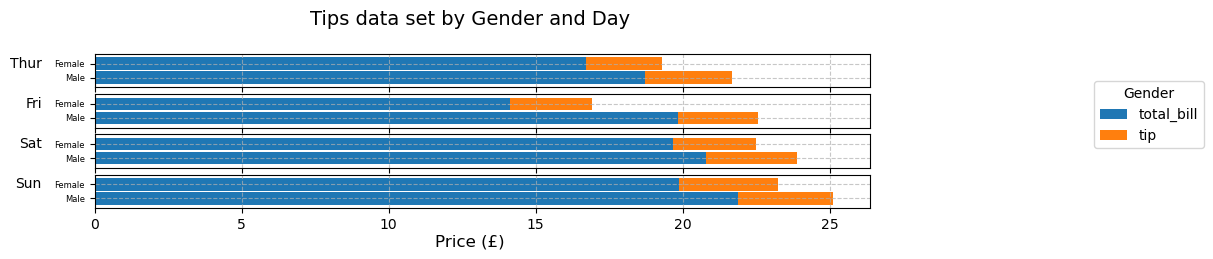

In [46]:
# The number of rows is set on the variable used for the subplots
nrows = tips_mean.index.nunique()

# set axis (shareex indicates that the x axis is shared among subplots)
fig, axes = plt.subplots(nrows, 1, figsize = (10, 0.5*nrows), sharex=True)

# populate the suplots
for idx, value in enumerate(tips_mean.index.unique()):
    # use pandas barh to make matplotlib barh plot based on index for each group
    tips_mean.loc[value].plot.barh(x = "sex", stacked = True, ax = axes[idx], legend = False, width = 0.9)
    # Set the y label to the value of the sub plot 
    axes[idx].set_ylabel(f'{value}', rotation=0, ha='right', labelpad=9)
    # Set the tick_params
    axes[idx].tick_params(axis='y', rotation=0, labelsize = 6)
    # Set the yaxis position
    axes[idx].yaxis.set_label_position('left')   
    # Add a grid
    axes[idx].grid(True, linestyle='--', alpha=0.7)    
    
# Add legend
axes[-1].legend(title='Gender', bbox_to_anchor=(1.44, nrows)) 
# Add title
fig.suptitle('Tips data set by Gender and Day', fontsize=14, y=1.1)  # Overall title
# Add x label
fig.text(0.5, -0.08, 'Price (£)', ha='center', fontsize=12)